# Lung cancer data exploration

In [41]:
# importación de datos y librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ruta del dataset
path = "survey lung cancer.csv"

# Importación de datos
archivo = pd.read_csv(path)
df = pd.DataFrame(archivo)

df.loc[:, 'SMOKING':'CHEST PAIN'] = df.loc[:, 'SMOKING':'CHEST PAIN'].replace({1: 'NO', 2: 'YES'})

# Resumen de las primeras filas de los datos
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


## Exploración inical de datos

### Tipos de datos

In [38]:
# Tipos de datos de las características
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                  object
YELLOW_FINGERS           object
ANXIETY                  object
PEER_PRESSURE            object
CHRONIC DISEASE          object
FATIGUE                  object
ALLERGY                  object
WHEEZING                 object
ALCOHOL CONSUMING        object
COUGHING                 object
SHORTNESS OF BREATH      object
SWALLOWING DIFFICULTY    object
CHEST PAIN               object
LUNG_CANCER              object
dtype: object

### Resumen estadístico

In [42]:
# Resumen estadístico de los datos
df.describe()

,AGE
count,309.000000
mean,62.673139
std,8.210301
min,21.000000
25%,57.000000
50%,62.000000
75%,69.000000
max,87.000000


In [52]:
# Valores únicos
for col in df:
    print(df[col].value_counts())

GENDER
M    162
F    147
Name: count, dtype: int64
AGE
64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64
SMOKING
YES    174
NO     135
Name: count, dtype: int64
YELLOW_FINGERS
YES    176
NO     133
Name: count, dtype: int64
ANXIETY
NO     155
YES    154
Name: count, dtype: int64
PEER_PRESSURE
YES    155
NO     154
Name: count, dtype: int64
CHRONIC DISEASE
YES    156
NO     153
Name: count, dtype: int64
FATIGUE 
YES    208
NO     101
Name: count, dtype: int64
ALLERGY 
YES    172
NO     137
Name: count, dtype: int64
WHEEZING
YES    172
NO     137
Name: count, dtype: int64
ALCOHOL CONSUMING
YES    172
NO     137
Name: count, dtype: int64
COUGHING
YES    179
NO     130

### Histograma

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


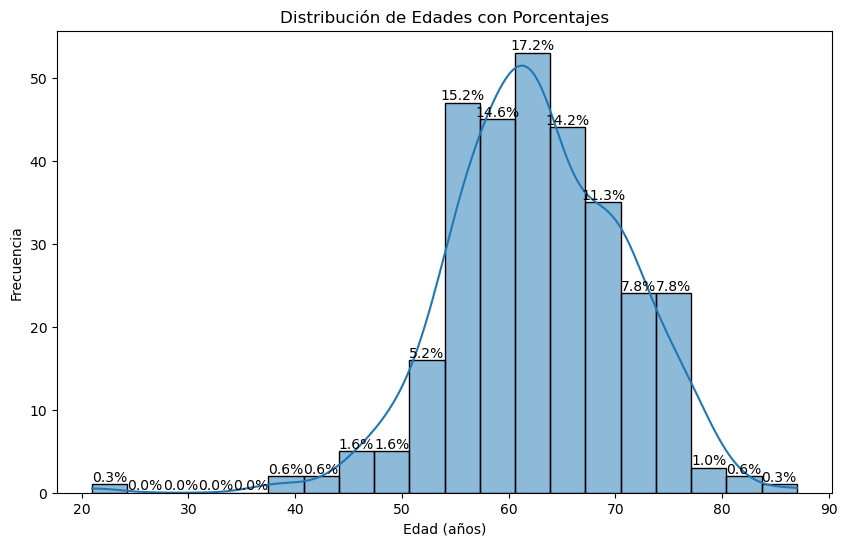

In [26]:
# Distribución de las edades de los participantes
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['AGE'], bins=20, kde=True)

# Agregar etiquetas de porcentajes
total = len(df['AGE'])
for p in ax.patches:
    percentAGE = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentAGE, (x, y), ha='center', va='bottom')

plt.title('Distribución de Edades con Porcentajes')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


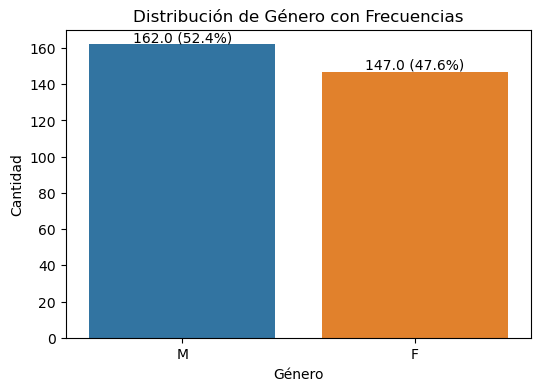

In [63]:
# Visualización de la proporción de género
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='GENDER', data=df)

# Agregar etiquetas de frecuencias
total = len(df['GENDER'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height/total:.1%})', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title('Distribución de Género con Frecuencias')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

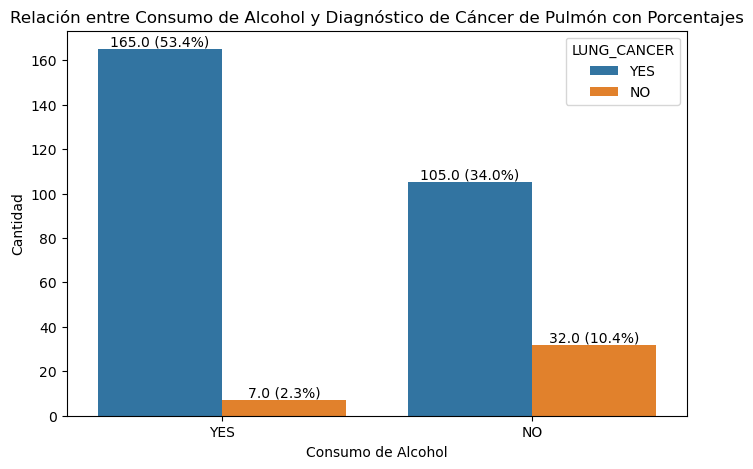

In [57]:
# Matriz de correlaión de variables
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='ALCOHOL CONSUMING', hue='LUNG_CANCER', data=df)

# Agregar etiquetas de porcentajes
total = len(df['ALCOHOL CONSUMING'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height/total:.1%})', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title('Relación entre Consumo de Alcohol y Diagnóstico de Cáncer de Pulmón con Porcentajes')
plt.xlabel('Consumo de Alcohol')
plt.ylabel('Cantidad')
plt.show()

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

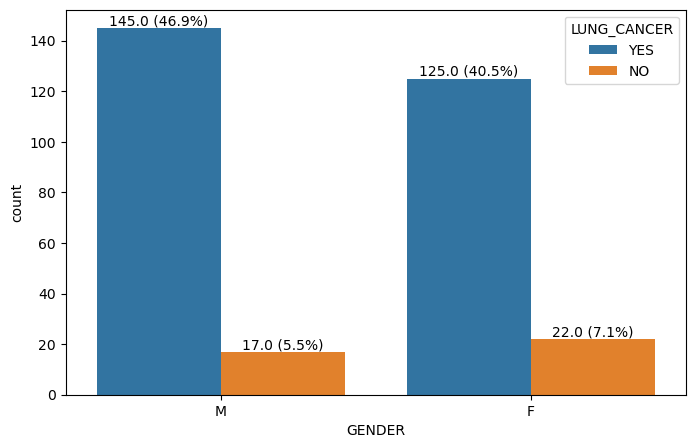

In [60]:
# Visualización de la relación entre género y diagnóstico de cáncer de pulmón
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df)

# Agregar etiquetas de porcentajes
total = len(df['GENDER'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height/total:.1%})', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

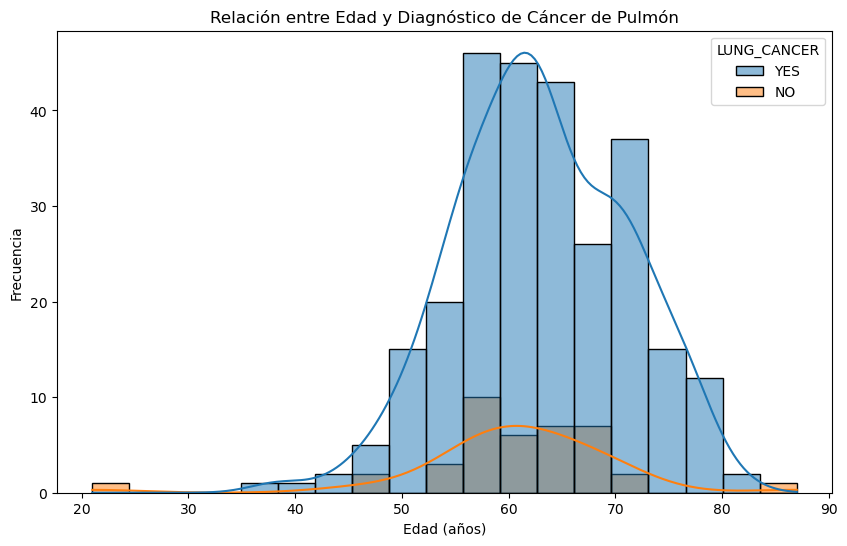

In [61]:
# Visualización de la relación entre edad y diagnóstico de cáncer de pulmón
plt.figure(figsize=(10, 6))
sns.histplot(x='AGE', hue='LUNG_CANCER', data=df, kde=True)
plt.title('Relación entre Edad y Diagnóstico de Cáncer de Pulmón')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

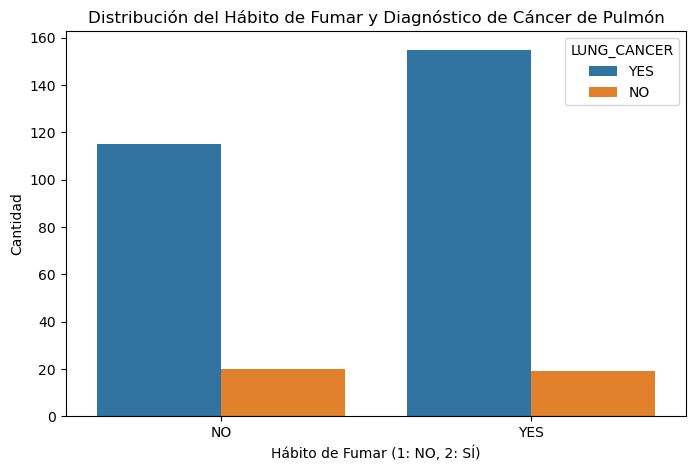

In [32]:
# Visualización de la distribución del hábito de fumar y diagnóstico de cáncer de pulmón
plt.figure(figsize=(8, 5))
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df)
plt.title('Distribución del Hábito de Fumar y Diagnóstico de Cáncer de Pulmón')
plt.xlabel('Hábito de Fumar (1: NO, 2: SÍ)')
plt.ylabel('Cantidad')
plt.show()

In [65]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


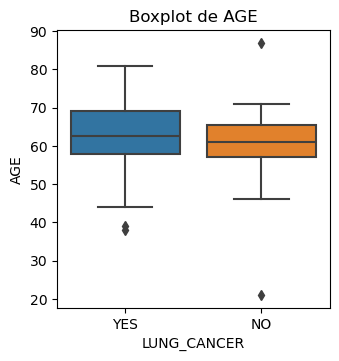

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# columns_to_plot = ['AGE', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 
#                     'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 
#                     'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

columns_to_plot = ['AGE']

# Crear subplots para cada columna
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x='LUNG_CANCER', y=column, data=df)
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

# Preprocesamiento

In [33]:
df.dropna(inplace=True)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,NO,NO,NO,YES,YES,YES,NO,NO,YES,YES,YES,YES,NO,YES
305,M,70,YES,NO,NO,NO,NO,YES,YES,YES,YES,YES,YES,NO,YES,YES
306,M,58,YES,NO,NO,NO,NO,NO,YES,YES,YES,YES,NO,NO,YES,YES
307,M,67,YES,NO,YES,NO,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES


In [14]:
df2 = pd.get_dummies(df, columns=['GENDER', 'SMOKING'], drop_first=False)
df2

,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M,SMOKING_1,SMOKING_2
0,69,2,2,1,1,2,1,2,2,2,2,2,2,YES,False,True,True,False
1,74,1,1,1,2,2,2,1,1,1,2,2,2,YES,False,True,False,True
2,59,1,1,2,1,2,1,2,1,2,2,1,2,NO,True,False,True,False
3,63,2,2,1,1,1,1,1,2,1,1,2,2,NO,False,True,False,True
4,63,2,1,1,1,1,1,2,1,2,2,1,1,NO,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,2,2,2,1,1,2,2,2,2,1,YES,True,False,True,False
305,70,1,1,1,1,2,2,2,2,2,2,1,2,YES,False,True,False,True
306,58,1,1,1,1,1,2,2,2,2,1,1,2,YES,False,True,False,True
307,67,1,2,1,1,2,2,1,2,2,2,1,2,YES,False,True,False,True


In [15]:
# Codificación de la variable objetivo 'LUNG_CANCER'
df2['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})
df2

,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M,SMOKING_1,SMOKING_2
0,69,2,2,1,1,2,1,2,2,2,2,2,2,1,False,True,True,False
1,74,1,1,1,2,2,2,1,1,1,2,2,2,1,False,True,False,True
2,59,1,1,2,1,2,1,2,1,2,2,1,2,0,True,False,True,False
3,63,2,2,1,1,1,1,1,2,1,1,2,2,0,False,True,False,True
4,63,2,1,1,1,1,1,2,1,2,2,1,1,0,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,2,2,2,1,1,2,2,2,2,1,1,True,False,True,False
305,70,1,1,1,1,2,2,2,2,2,2,1,2,1,False,True,False,True
306,58,1,1,1,1,1,2,2,2,2,1,1,2,1,False,True,False,True
307,67,1,2,1,1,2,2,1,2,2,2,1,2,1,False,True,False,True


In [16]:
# Normalización de la columna 'AGE'
df2['AGE'] = (df['AGE'] - df['AGE'].mean()) / df['AGE'].std()
df2

,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M,SMOKING_1,SMOKING_2
0,0.770600,2,2,1,1,2,1,2,2,2,2,2,2,1,False,True,True,False
1,1.379591,1,1,1,2,2,2,1,1,1,2,2,2,1,False,True,False,True
2,-0.447382,1,1,2,1,2,1,2,1,2,2,1,2,0,True,False,True,False
3,0.039811,2,2,1,1,1,1,1,2,1,1,2,2,0,False,True,False,True
4,0.039811,2,1,1,1,1,1,2,1,2,2,1,1,0,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,-0.812776,1,1,2,2,2,1,1,2,2,2,2,1,1,True,False,True,False
305,0.892399,1,1,1,1,2,2,2,2,2,2,1,2,1,False,True,False,True
306,-0.569180,1,1,1,1,1,2,2,2,2,1,1,2,1,False,True,False,True
307,0.527004,1,2,1,1,2,2,1,2,2,2,1,2,1,False,True,False,True
